# 분석 준비

In [1]:
import pandas as pd
import numpy as np
import os
import re

# 시각화를 위한 패키지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # '-' 깨짐 방지

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic' # 한글 깨짐 방지
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (8, 6)
# %matplotlib inline

import seaborn as sns
# sns.set()

# 결측값 시각화를 위한 패키지
import missingno as msno

# Load data

In [ ]:
os.chdir(r"C:\Users\Gram\Desktop\네이버뉴스 립스틱효과\2. 경기종합지수,상관관계")

In [4]:
rawdata = pd.read_csv("9.2.1 소비자동향조사(한국은행_전국).csv", encoding='CP949')
print(rawdata.shape)

(82, 62)


In [5]:
rawdata.head()

,항목명1,항목명2,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,...,2019년 3월,2019년 4월,2019년 5월,2019년 6월,2019년 7월,2019년 8월,2019년 9월,2019년 10월,2019년 11월,2019년 12월
0,경기종합지수(동행지수순환변동치),전체,99.9,100.2,100.1,100.1,99.7,99.5,99.5,99.8,...,99.2,99.2,99.5,99.4,99.3,99.5,99.5,99.4,99.3,NaN
1,현재경기판단CSI,전체,74.0,71.0,72.0,77.0,79.0,65.0,63.0,71.0,...,70.0,74.0,69.0,69.0,67.0,63.0,68.0,72.0,73.0,74.0
2,현재경기판단CSI,남자,75.0,71.0,73.0,78.0,80.0,65.0,63.0,71.0,...,69.0,73.0,68.0,67.0,66.0,61.0,67.0,71.0,72.0,73.0
3,현재경기판단CSI,여자,72.0,71.0,71.0,74.0,79.0,64.0,64.0,72.0,...,72.0,76.0,75.0,75.0,74.0,69.0,73.0,77.0,78.0,78.0
4,현재경기판단CSI,40세미만,74.0,71.0,71.0,73.0,77.0,64.0,66.0,68.0,...,79.0,85.0,79.0,79.0,78.0,71.0,79.0,81.0,83.0,82.0


In [6]:
rawdata.tail()

,항목명1,항목명2,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,...,2019년 3월,2019년 4월,2019년 5월,2019년 6월,2019년 7월,2019년 8월,2019년 9월,2019년 10월,2019년 11월,2019년 12월
77,교통비 및 통신비 지출전망CSI,40-50세,115.0,117.0,115.0,114.0,112.0,113.0,115.0,112.0,...,111.0,111.0,112.0,109.0,107.0,107.0,109.0,108.0,110.0,110.0
78,교통비 및 통신비 지출전망CSI,50-60세,115.0,115.0,113.0,115.0,114.0,114.0,118.0,113.0,...,109.0,110.0,112.0,109.0,106.0,106.0,106.0,108.0,108.0,107.0
79,교통비 및 통신비 지출전망CSI,60-70세,107.0,106.0,105.0,110.0,107.0,110.0,109.0,110.0,...,105.0,105.0,108.0,107.0,103.0,100.0,104.0,103.0,103.0,104.0
80,교통비 및 통신비 지출전망CSI,70세이상,104.0,110.0,106.0,111.0,107.0,108.0,107.0,107.0,...,106.0,108.0,113.0,109.0,109.0,107.0,106.0,106.0,105.0,108.0
81,소비자심리지수,전체,102.1,102.8,100.9,103.7,105.0,97.7,99.8,101.1,...,99.8,101.7,97.9,97.6,95.9,92.4,97.0,98.6,101.0,100.5


# EDA

In [7]:
df = rawdata.copy()
df.head()

,항목명1,항목명2,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,...,2019년 3월,2019년 4월,2019년 5월,2019년 6월,2019년 7월,2019년 8월,2019년 9월,2019년 10월,2019년 11월,2019년 12월
0,경기종합지수(동행지수순환변동치),전체,99.9,100.2,100.1,100.1,99.7,99.5,99.5,99.8,...,99.2,99.2,99.5,99.4,99.3,99.5,99.5,99.4,99.3,NaN
1,현재경기판단CSI,전체,74.0,71.0,72.0,77.0,79.0,65.0,63.0,71.0,...,70.0,74.0,69.0,69.0,67.0,63.0,68.0,72.0,73.0,74.0
2,현재경기판단CSI,남자,75.0,71.0,73.0,78.0,80.0,65.0,63.0,71.0,...,69.0,73.0,68.0,67.0,66.0,61.0,67.0,71.0,72.0,73.0
3,현재경기판단CSI,여자,72.0,71.0,71.0,74.0,79.0,64.0,64.0,72.0,...,72.0,76.0,75.0,75.0,74.0,69.0,73.0,77.0,78.0,78.0
4,현재경기판단CSI,40세미만,74.0,71.0,71.0,73.0,77.0,64.0,66.0,68.0,...,79.0,85.0,79.0,79.0,78.0,71.0,79.0,81.0,83.0,82.0


## missing value

In [8]:
df.isnull().sum()

항목명1         0
항목명2         0
2015년 1월     0
2015년 2월     0
2015년 3월     0
            ..
2019년 8월     0
2019년 9월     0
2019년 10월    0
2019년 11월    0
2019년 12월    1
Length: 62, dtype: int64

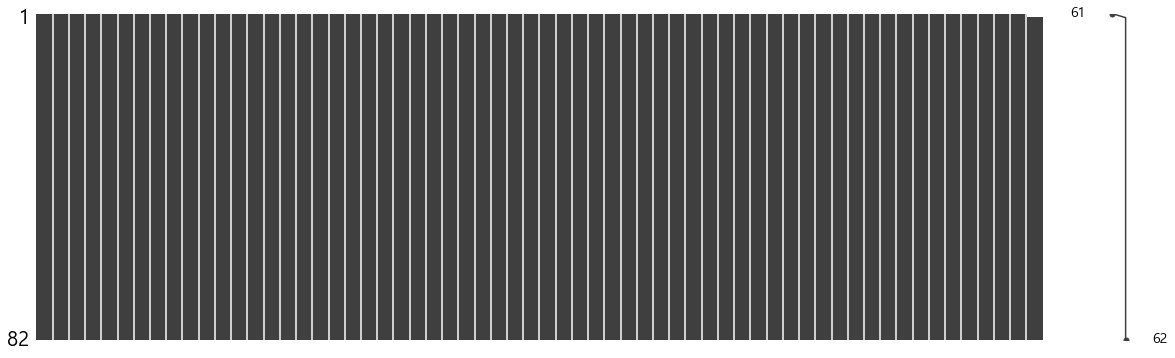

In [9]:
msno.matrix(df, figsize=(20,6))

In [10]:
# 경기종합지수 결측열 제거
df = df.drop(['2019년 12월'], axis=1)

## 공백 제거

In [11]:
# 행이름, 데이터 공백 제거
df['항목명1'] = list(map(lambda x: x.strip(), df['항목명1'].values))
df['항목명2'] = list(map(lambda x: x.strip(), df['항목명2'].values))

# 경기침체기 탐색

In [12]:
df_eco = df.T
df_eco.columns = df_eco.loc['항목명1']
df_eco = df_eco.drop(['항목명1', '항목명2'], axis=0)
df_eco = df_eco[['경기종합지수(동행지수순환변동치)', '소비자심리지수']]
df_eco.head()

항목명1,경기종합지수(동행지수순환변동치),소비자심리지수
2015년 1월,99.9,102.1
2015년 2월,100.2,102.8
2015년 3월,100.1,100.9
2015년 4월,100.1,103.7
2015년 5월,99.7,105


## MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_eco['경기종합지수(동행지수순환변동치)'] = scaler.fit_transform(np.array(df_eco['경기종합지수(동행지수순환변동치)']).reshape(-1, 1))
df_eco['소비자심리지수'] = scaler.fit_transform(np.array(df_eco['소비자심리지수']).reshape(-1, 1))

In [14]:
df_eco.head()

항목명1,경기종합지수(동행지수순환변동치),소비자심리지수
2015년 1월,0.466667,0.487562
2015년 2월,0.666667,0.522388
2015년 3월,0.600000,0.427861
2015년 4월,0.600000,0.567164
2015년 5월,0.333333,0.631841


## rawdata

([<matplotlib.axis.XTick at 0x1ca42ec5488>,
 <a list of 10 Text xticklabel objects>)

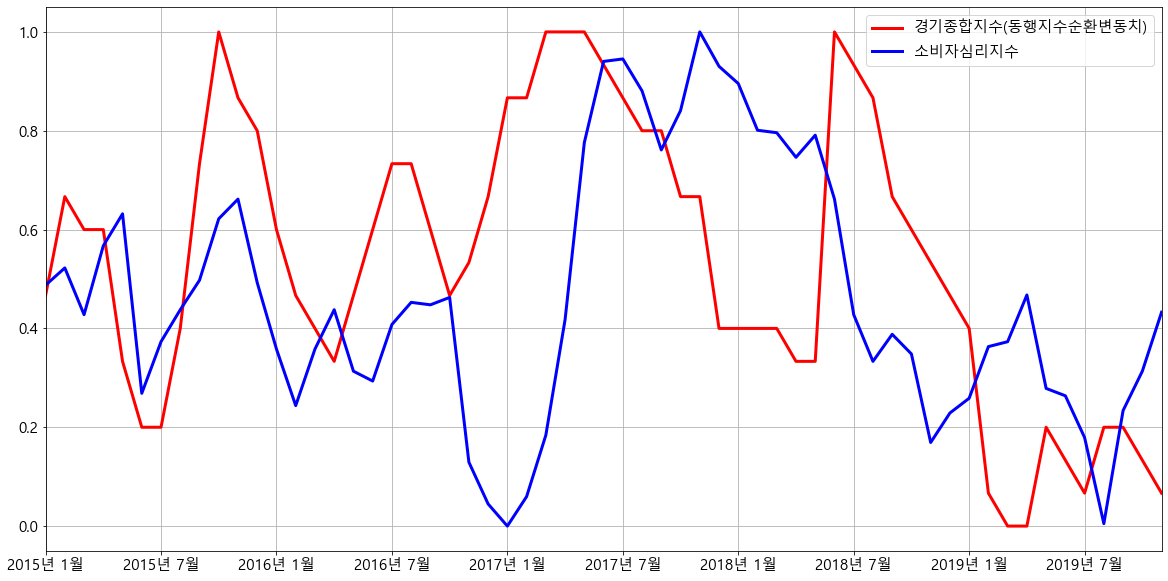

In [15]:
df_eco.plot(figsize=(20, 10), fontsize=15, grid=True, 
            color=['red', 'blue'], linewidth=3)
plt.legend(fontsize=15)
plt.xticks([0,6,12,18,24,30,36,42,48,54], 
           ['2015년 1월','2015년 7월','2016년 1월','2016년 7월','2017년 1월','2017년 7월','2018년 1월','2018년 7월','2019년 1월','2019년 7월'])

## 2개월 이동평균

In [16]:
ma2 = df_eco['경기종합지수(동행지수순환변동치)'].rolling(window=2).mean()
df_eco.insert(len(df_eco.columns), "경기종합지수_MA2", ma2)

ma22 = df_eco['소비자심리지수'].rolling(window=2).mean()
df_eco.insert(len(df_eco.columns), "소비자심리지수_MA2", ma22)

([<matplotlib.axis.XTick at 0x1ca43374d88>,
 <a list of 10 Text xticklabel objects>)

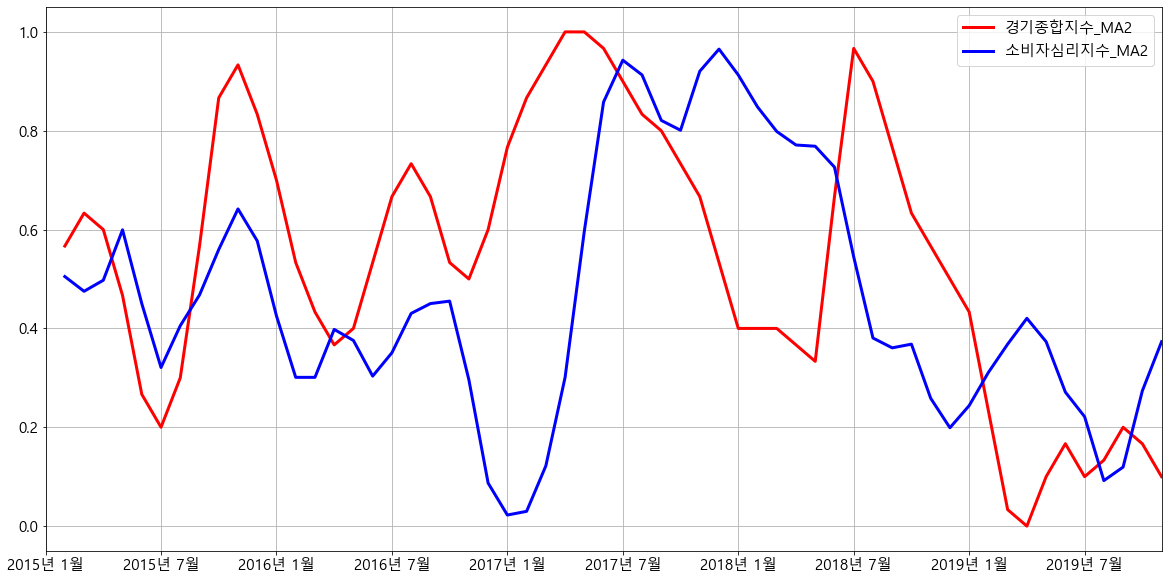

In [17]:
df_eco[['경기종합지수_MA2', '소비자심리지수_MA2']].plot(figsize=(20, 10), fontsize=15, grid=True, 
            color=['red', 'blue'], linewidth=3)
plt.legend(fontsize=15)
plt.xticks([0,6,12,18,24,30,36,42,48,54], 
           ['2015년 1월','2015년 7월','2016년 1월','2016년 7월','2017년 1월','2017년 7월','2018년 1월','2018년 7월','2019년 1월','2019년 7월'])

## 3개월 이동평균

In [18]:
ma3 = df_eco['경기종합지수(동행지수순환변동치)'].rolling(window=3).mean()
df_eco.insert(len(df_eco.columns), "경기종합지수_MA3", ma3)

ma33 = df_eco['소비자심리지수'].rolling(window=3).mean()
df_eco.insert(len(df_eco.columns), "소비자심리지수_MA3", ma33)

([<matplotlib.axis.XTick at 0x1ca42fce588>,
 <a list of 10 Text xticklabel objects>)

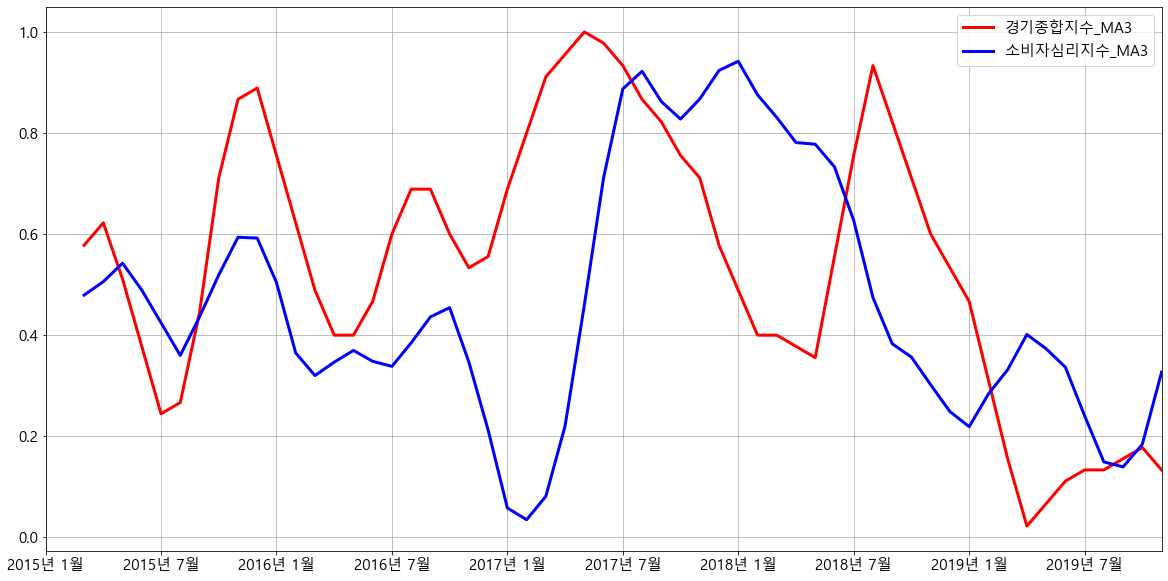

In [19]:
df_eco[['경기종합지수_MA3', '소비자심리지수_MA3']].plot(figsize=(20, 10), fontsize=15, grid=True, 
            color=['red', 'blue'], linewidth=3)
plt.legend(fontsize=15)
plt.xticks([0,6,12,18,24,30,36,42,48,54], 
           ['2015년 1월','2015년 7월','2016년 1월','2016년 7월','2017년 1월','2017년 7월','2018년 1월','2018년 7월','2019년 1월','2019년 7월'])

## 6개월 이동평균

In [20]:
ma6 = df_eco['경기종합지수(동행지수순환변동치)'].rolling(window=6).mean()
df_eco.insert(len(df_eco.columns), "경기종합지수_MA6", ma6)

ma66 = df_eco['소비자심리지수'].rolling(window=6).mean()
df_eco.insert(len(df_eco.columns), "소비자심리지수_MA6", ma66)

([<matplotlib.axis.XTick at 0x1ca432d4488>,
 <a list of 10 Text xticklabel objects>)

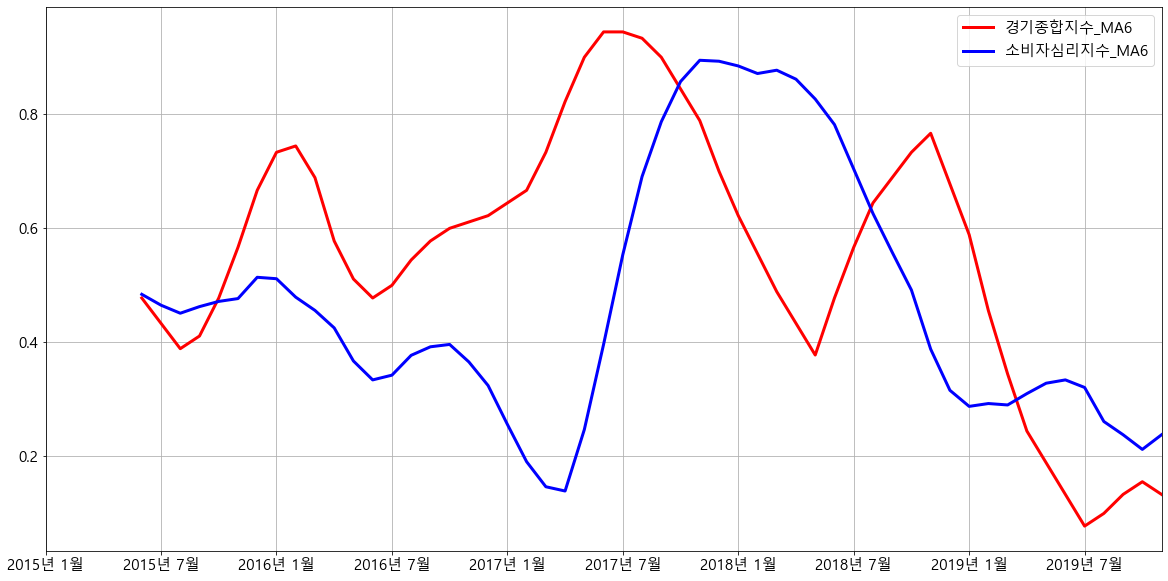

In [21]:
df_eco[['경기종합지수_MA6', '소비자심리지수_MA6']].plot(figsize=(20, 10), fontsize=15, grid=True, 
            color=['red', 'blue'], linewidth=3)
plt.legend(fontsize=15)
plt.xticks([0,6,12,18,24,30,36,42,48,54], 
           ['2015년 1월','2015년 7월','2016년 1월','2016년 7월','2017년 1월','2017년 7월','2018년 1월','2018년 7월','2019년 1월','2019년 7월'])

-> 분석 기간 : 2017/7 - 2018/12 

# 경제침체기 검증

## rawdata

In [22]:
d1 = df_eco.loc['2015년 6월':'2019년 6월', '경기종합지수(동행지수순환변동치)'].values
d2 = df_eco.loc['2015년 11월':, '소비자심리지수'].values
np.corrcoef(d1, d2)

array([[1.        , 0.37035444],
       [0.37035444, 1.        ]])

-> 전체 기간의 상관계수는 0.37

In [23]:
d1 = df_eco.loc['2017년 7월':'2018년 5월', '경기종합지수(동행지수순환변동치)'].values
d2 = df_eco.loc['2018년 2월':'2018년 12월', '소비자심리지수'].values
np.corrcoef(d1, d2)

array([[1.        , 0.95777605],
       [0.95777605, 1.        ]])

-> 경기 침체기간의 상관계수는 0.96

## MA(6)

In [24]:
d1 = df_eco.loc['2015년 6월':'2019년 6월', '경기종합지수_MA6'].values
d2 = df_eco.loc['2015년 11월':, '소비자심리지수_MA6'].values
np.corrcoef(d1, d2)

array([[1.        , 0.58379559],
       [0.58379559, 1.        ]])

-> 전체 기간의 상관계수는 0.58

In [25]:
d1 = df_eco.loc['2017년 7월':'2018년 5월', '경기종합지수_MA6'].values
d2 = df_eco.loc['2018년 2월':'2018년 12월', '소비자심리지수_MA6'].values
np.corrcoef(d1, d2)

array([[1.        , 0.98976982],
       [0.98976982, 1.        ]])

-> 경기 침체기간의 상관계수는 0.99

# Feature Engineering

In [26]:
df.head()

,항목명1,항목명2,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,...,2019년 2월,2019년 3월,2019년 4월,2019년 5월,2019년 6월,2019년 7월,2019년 8월,2019년 9월,2019년 10월,2019년 11월
0,경기종합지수(동행지수순환변동치),전체,99.9,100.2,100.1,100.1,99.7,99.5,99.5,99.8,...,99.3,99.2,99.2,99.5,99.4,99.3,99.5,99.5,99.4,99.3
1,현재경기판단CSI,전체,74.0,71.0,72.0,77.0,79.0,65.0,63.0,71.0,...,70.0,70.0,74.0,69.0,69.0,67.0,63.0,68.0,72.0,73.0
2,현재경기판단CSI,남자,75.0,71.0,73.0,78.0,80.0,65.0,63.0,71.0,...,70.0,69.0,73.0,68.0,67.0,66.0,61.0,67.0,71.0,72.0
3,현재경기판단CSI,여자,72.0,71.0,71.0,74.0,79.0,64.0,64.0,72.0,...,71.0,72.0,76.0,75.0,75.0,74.0,69.0,73.0,77.0,78.0
4,현재경기판단CSI,40세미만,74.0,71.0,71.0,73.0,77.0,64.0,66.0,68.0,...,79.0,79.0,85.0,79.0,79.0,78.0,71.0,79.0,81.0,83.0


In [27]:
df = df[['항목명1', '항목명2', 
         '2017년 7월', '2017년 8월', '2017년 9월', '2017년 10월', '2017년 11월', '2017년 12월', 
         '2018년 1월', '2018년 2월', '2018년 3월', '2018년 4월', '2018년 5월', '2017년 6월', 
         '2018년 7월', '2018년 8월', '2018년 9월', '2018년 10월', '2018년 11월', '2018년 12월']]

# 항목별 지출 추이

## 전체

In [28]:
df_all = df[df['항목명2'] == '전체']
df_all = df_all.T
df_all.columns = df_all.loc['항목명1']
df_all = df_all.drop(['항목명1', '항목명2'], axis=0)
df_all['경기_소비자_중앙값'] = (df_all['경기종합지수(동행지수순환변동치)'] + df_all['소비자심리지수']) / 2

for c in df_all.columns:
    df_all[c] = df_all[c].astype('float')
    
df_all.head()

항목명1,경기종합지수(동행지수순환변동치),현재경기판단CSI,소비지출전망CSI,내구재 지출전망CSI,의류비 지출전망CSI,외식비 지출전망CSI,여행비 지출전망CSI,교육비 지출전망CSI,의료·보건비 지출전망CSI,교양·오락·문화생활비 지출전망CSI,교통비 및 통신비 지출전망CSI,소비자심리지수,경기_소비자_중앙값
2017년 7월,100.5,96.0,108.0,97.0,101.0,94.0,99.0,106.0,111.0,91.0,108.0,111.3,105.9
2017년 8월,100.4,93.0,109.0,96.0,100.0,95.0,95.0,107.0,112.0,92.0,108.0,110.0,105.2
2017년 9월,100.4,87.0,107.0,96.0,103.0,94.0,95.0,106.0,112.0,90.0,109.0,107.6,104.0
2017년 10월,100.2,91.0,108.0,96.0,103.0,93.0,95.0,107.0,112.0,91.0,109.0,109.2,104.7
2017년 11월,100.2,98.0,109.0,97.0,103.0,94.0,97.0,108.0,112.0,93.0,109.0,112.4,106.3


In [29]:
df_all2 = df_all.copy()

In [30]:
scaler = MinMaxScaler()
df_all2['경기_소비자_중앙값'] = scaler.fit_transform(np.array(df_all2['경기_소비자_중앙값']).reshape(-1, 1))
df_all2['의료·보건비 지출전망CSI'] = scaler.fit_transform(np.array(df_all2['의료·보건비 지출전망CSI']).reshape(-1, 1))
df_all2['교양·오락·문화생활비 지출전망CSI'] = scaler.fit_transform(np.array(df_all2['교양·오락·문화생활비 지출전망CSI']).reshape(-1, 1))

([<matplotlib.axis.XTick at 0x1ca43971e48>,
 <a list of 6 Text xticklabel objects>)

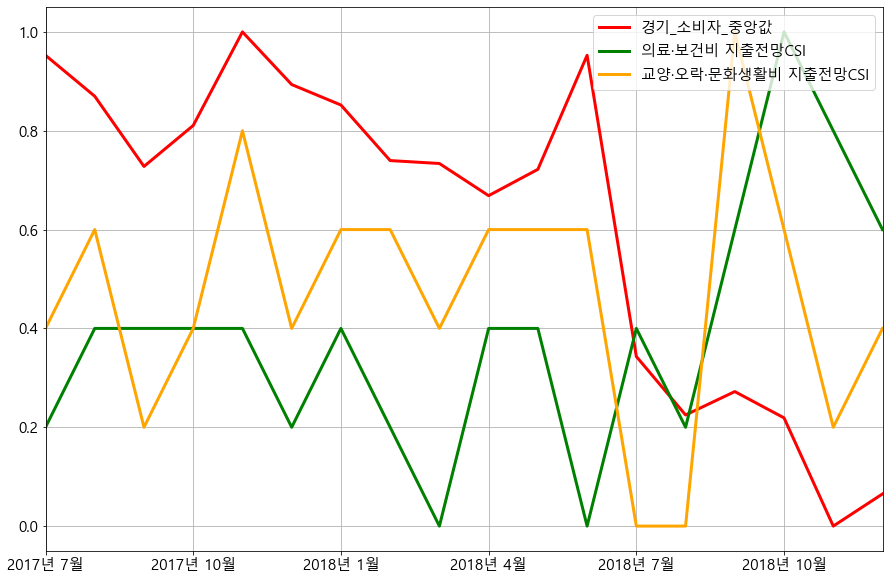

In [31]:
df_all2[['경기_소비자_중앙값', '의료·보건비 지출전망CSI', '교양·오락·문화생활비 지출전망CSI']].plot(figsize=(15, 10), fontsize=15, grid=True, 
            color=['red', 'green', 'orange'], linewidth=3)
plt.legend(fontsize=15, loc='upper right')
plt.xticks([0,3,6,9,12,15], 
           ['2017년 7월','2017년 10월','2018년 1월','2018년 4월','2018년 7월','2018년 10월'])

In [32]:
corr_all = df_all.corrwith(df_all.경기_소비자_중앙값, method='pearson') 
corr_all = pd.DataFrame(corr_all, columns=['상관계수']) 
corr_all = corr_all.sort_values(by='상관계수')
corr_all

,상관계수
항목명1,
의료·보건비 지출전망CSI,-0.647909
경기종합지수(동행지수순환변동치),0.014498
소비지출전망CSI,0.019424
교양·오락·문화생활비 지출전망CSI,0.318635
교통비 및 통신비 지출전망CSI,0.324965
내구재 지출전망CSI,0.681692
외식비 지출전망CSI,0.729150
교육비 지출전망CSI,0.799966
의류비 지출전망CSI,0.818391


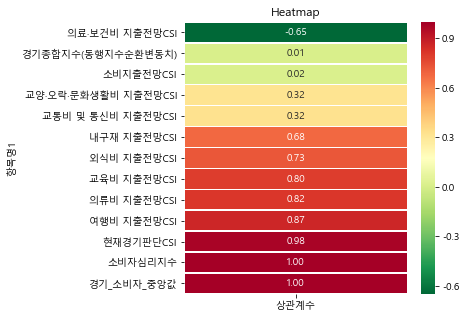

In [33]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_all, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show() 

## 남자

In [34]:
df_man = df[df['항목명2'] == '남자']
df_man = pd.concat([df.iloc[[0]], df.iloc[[81]], df_man])
df_man = df_man.T
df_man.columns = df_man.loc['항목명1']
df_man = df_man.drop(['항목명1', '항목명2'], axis=0)
df_man['경기_소비자_중앙값'] = (df_man['경기종합지수(동행지수순환변동치)'] + df_man['소비자심리지수']) / 2

for c in df_man.columns:
    df_man[c] = df_man[c].astype('float')

In [35]:
corr_man = df_man.corrwith(df_man.경기_소비자_중앙값, method='pearson') 
corr_man = pd.DataFrame(corr_man, columns=['상관계수']) 
corr_man = corr_man.sort_values(by='상관계수')

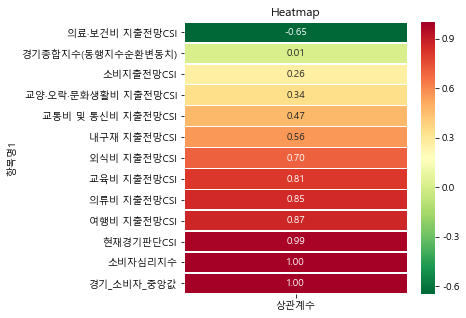

In [36]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_man, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show() 

## 여자

In [37]:
df_woman = df[df['항목명2'] == '여자']
df_woman = pd.concat([df.iloc[[0]], df.iloc[[81]], df_woman])
df_woman = df_woman.T
df_woman.columns = df_woman.loc['항목명1']
df_woman = df_woman.drop(['항목명1', '항목명2'], axis=0)
df_woman['경기_소비자_중앙값'] = (df_woman['경기종합지수(동행지수순환변동치)'] + df_woman['소비자심리지수']) / 2

for c in df_woman.columns:
    df_woman[c] = df_woman[c].astype('float')

In [38]:
corr_woman = df_woman.corrwith(df_woman.경기_소비자_중앙값, method='pearson') 
corr_woman = pd.DataFrame(corr_woman, columns=['상관계수']) 
corr_woman = corr_woman.sort_values(by='상관계수')

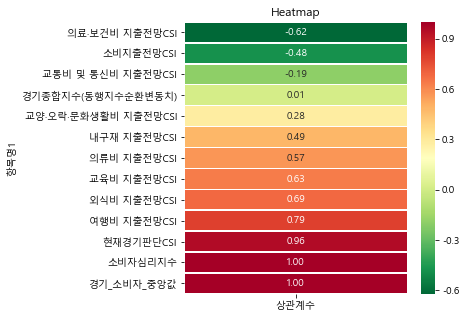

In [39]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_woman, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show() 

## 40세 미만

In [40]:
df_40 = df[df['항목명2'] == '40세미만']
df_40 = pd.concat([df.iloc[[0]], df.iloc[[81]], df_40])
df_40 = df_40.T
df_40.columns = df_40.loc['항목명1']
df_40 = df_40.drop(['항목명1', '항목명2'], axis=0)
df_40['경기_소비자_중앙값'] = (df_40['경기종합지수(동행지수순환변동치)'] + df_40['소비자심리지수']) / 2

for c in df_40.columns:
    df_40[c] = df_40[c].astype('float')

In [41]:
corr_40 = df_40.corrwith(df_40.경기_소비자_중앙값, method='pearson') 
corr_40 = pd.DataFrame(corr_40, columns=['상관계수']) 
corr_40 = corr_40.sort_values(by='상관계수')

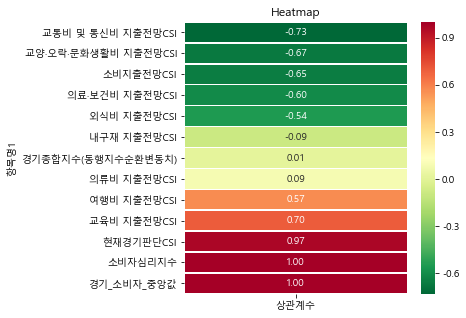

In [42]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_40, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show() 

## 40-50세

In [43]:
df_450 = df[df['항목명2'] == '40-50세']
df_450 = pd.concat([df.iloc[[0]], df.iloc[[81]], df_450])
df_450 = df_450.T
df_450.columns = df_450.loc['항목명1']
df_450 = df_450.drop(['항목명1', '항목명2'], axis=0)
df_450['경기_소비자_중앙값'] = (df_450['경기종합지수(동행지수순환변동치)'] + df_450['소비자심리지수']) / 2

for c in df_450.columns:
    df_450[c] = df_450[c].astype('float')

In [44]:
corr_450 = df_450.corrwith(df_450.경기_소비자_중앙값, method='pearson') 
corr_450 = pd.DataFrame(corr_450, columns=['상관계수']) 
corr_450 = corr_450.sort_values(by='상관계수')

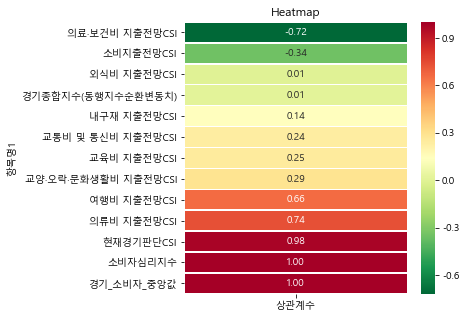

In [45]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_450, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show() 

## 50-60세

In [46]:
df_560 = df[df['항목명2'] == '50-60세']
df_560 = pd.concat([df.iloc[[0]], df.iloc[[81]], df_560])
df_560 = df_560.T
df_560.columns = df_560.loc['항목명1']
df_560 = df_560.drop(['항목명1', '항목명2'], axis=0)
df_560['경기_소비자_중앙값'] = (df_560['경기종합지수(동행지수순환변동치)'] + df_560['소비자심리지수']) / 2

for c in df_560.columns:
    df_560[c] = df_560[c].astype('float')

In [47]:
corr_560 = df_560.corrwith(df_560.경기_소비자_중앙값, method='pearson') 
corr_560 = pd.DataFrame(corr_560, columns=['상관계수']) 
corr_560 = corr_560.sort_values(by='상관계수')

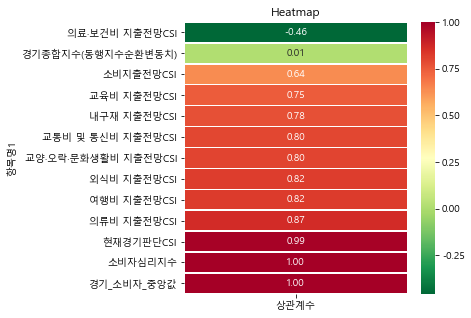

In [48]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_560, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show()

## 60-70세

In [49]:
df_670 = df[df['항목명2'] == '60-70세']
df_670 = pd.concat([df.iloc[[0]], df.iloc[[81]], df_670])
df_670 = df_670.T
df_670.columns = df_670.loc['항목명1']
df_670 = df_670.drop(['항목명1', '항목명2'], axis=0)
df_670['경기_소비자_중앙값'] = (df_670['경기종합지수(동행지수순환변동치)'] + df_670['소비자심리지수']) / 2

for c in df_670.columns:
    df_670[c] = df_670[c].astype('float')

In [50]:
corr_670 = df_670.corrwith(df_670.경기_소비자_중앙값, method='pearson') 
corr_670 = pd.DataFrame(corr_670, columns=['상관계수']) 
corr_670 = corr_670.sort_values(by='상관계수')

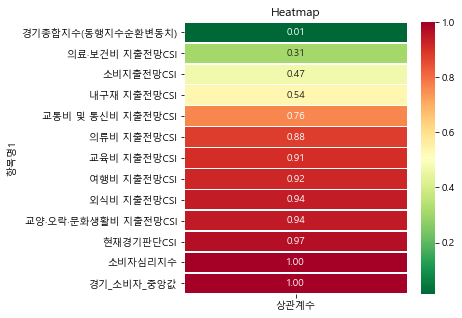

In [51]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_670, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show()

## 70세 이상

In [52]:
df_70 = df[df['항목명2'] == '70세이상']
df_70 = pd.concat([df.iloc[[0]], df.iloc[[81]], df_70])
df_70 = df_70.T
df_70.columns = df_70.loc['항목명1']
df_70 = df_70.drop(['항목명1', '항목명2'], axis=0)
df_70['경기_소비자_중앙값'] = (df_70['경기종합지수(동행지수순환변동치)'] + df_70['소비자심리지수']) / 2

for c in df_70.columns:
    df_70[c] = df_70[c].astype('float')

In [53]:
corr_70 = df_70.corrwith(df_70.경기_소비자_중앙값, method='pearson') 
corr_70 = pd.DataFrame(corr_70, columns=['상관계수']) 
corr_70 = corr_70.sort_values(by='상관계수')

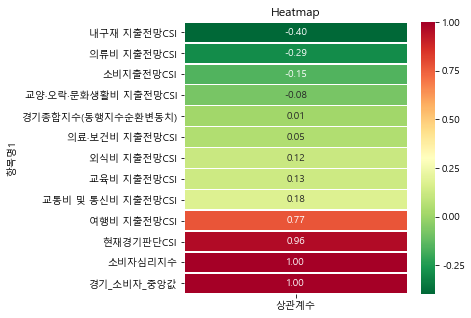

In [54]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr_70, annot=True, fmt='.2f', linewidths=.5, cmap='RdYlGn_r')
plt.title('Heatmap')
plt.show()

# 시계열 예측

Facebook 데이터 과학팀에서 제공하는 오픈소스 시계열 예측 라이브러리 

In [55]:
from fbprophet import Prophet
from datetime import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [56]:
rawdata2 = pd.read_csv("9.2.1 소비자동향조사(한국은행_전국)(2009~).csv", encoding='CP949')

df_ts = rawdata2.copy()

# 행이름, 데이터 공백 제거
df_ts['항목명1'] = list(map(lambda x: x.strip(), df_ts['항목명1'].values))
df_ts['항목명2'] = list(map(lambda x: x.strip(), df_ts['항목명2'].values))

In [57]:
# '전체' 추출
df_ts_all = df_ts[df_ts['항목명2'] == '전체']
df_ts_all = df_ts_all.T
df_ts_all.columns = df_ts_all.loc['항목명1']
df_ts_all = df_ts_all.drop(['항목명1', '항목명2'], axis=0)
for c in df_ts_all.columns:
    df_ts_all[c] = df_ts_all[c].astype('float')
    
df_ts_all.head()

항목명1,경기종합지수(동행지수순환변동치),내구재 지출전망CSI,의류비 지출전망CSI,외식비 지출전망CSI,여행비 지출전망CSI,교육비 지출전망CSI,의료·보건비 지출전망CSI,교양·오락·문화생활비 지출전망CSI,교통비 및 통신비 지출전망CSI,소비자심리지수
2009년 1월,97.8,76.0,85.0,68.0,63.0,104.0,107.0,76.0,103.0,74.8
2009년 2월,97.7,76.0,85.0,68.0,63.0,105.0,107.0,75.0,103.0,76.4
2009년 3월,97.8,75.0,82.0,66.0,61.0,104.0,106.0,71.0,100.0,72.8
2009년 4월,97.9,82.0,91.0,75.0,69.0,106.0,109.0,81.0,107.0,93.0
2009년 5월,97.9,88.0,97.0,83.0,80.0,109.0,112.0,89.0,108.0,104.1


In [58]:
timestamp = []
for t in df_ts_all.index:
    t = t.replace("년", "")
    t = t.replace("월", "")
    t = t.replace(" ", "")
    timestamp.append(datetime.strptime(t, '%Y%m'))   

## 경기종합지수

In [59]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['경기종합지수(동행지수순환변동치)'].values

In [60]:
m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
138,2020-06-30,98.957805,98.517614,99.326277,98.752834,99.154946,-0.016263,-0.016263,-0.016263,-0.016263,-0.016263,-0.016263,0.0,0.0,0.0,98.941542
139,2020-07-31,98.917950,98.714653,99.540001,98.667448,99.151747,0.215809,0.215809,0.215809,0.215809,0.215809,0.215809,0.0,0.0,0.0,99.133758
140,2020-08-31,98.878094,98.545639,99.468692,98.589229,99.159387,0.129639,0.129639,0.129639,0.129639,0.129639,0.129639,0.0,0.0,0.0,99.007734
141,2020-09-30,98.839525,98.537572,99.529242,98.496428,99.167317,0.193011,0.193011,0.193011,0.193011,0.193011,0.193011,0.0,0.0,0.0,99.032536
142,2020-10-31,98.799670,98.183609,99.222059,98.409308,99.163616,-0.099443,-0.099443,-0.099443,-0.099443,-0.099443,-0.099443,0.0,0.0,0.0,98.700227


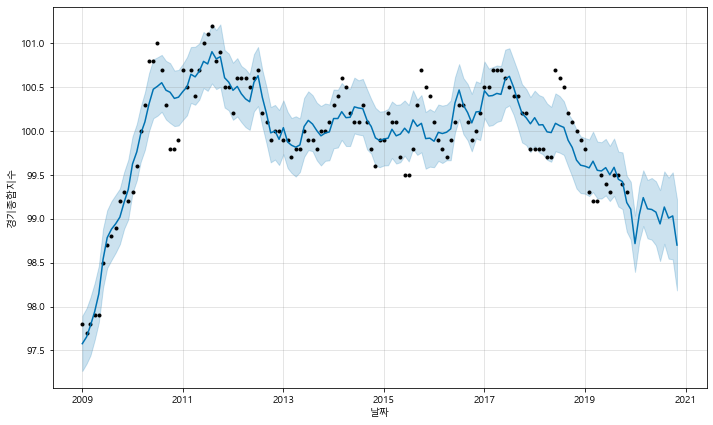

<Figure size 1440x720 with 0 Axes>

In [61]:
m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('경기종합지수')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 소비자심리지수

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


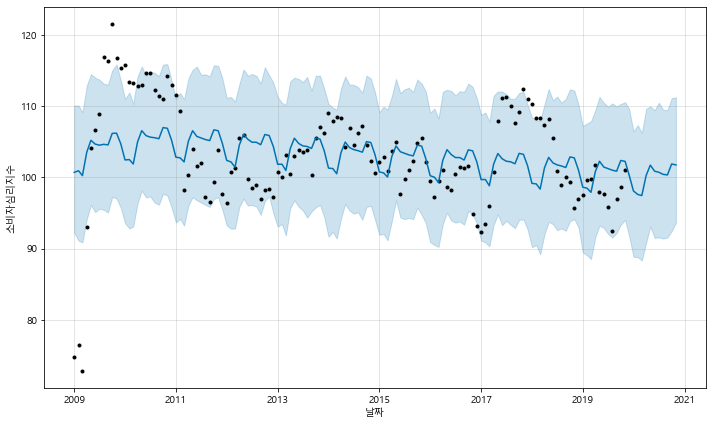

<Figure size 1440x720 with 0 Axes>

In [62]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['소비자심리지수'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('소비자심리지수')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 내구재비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


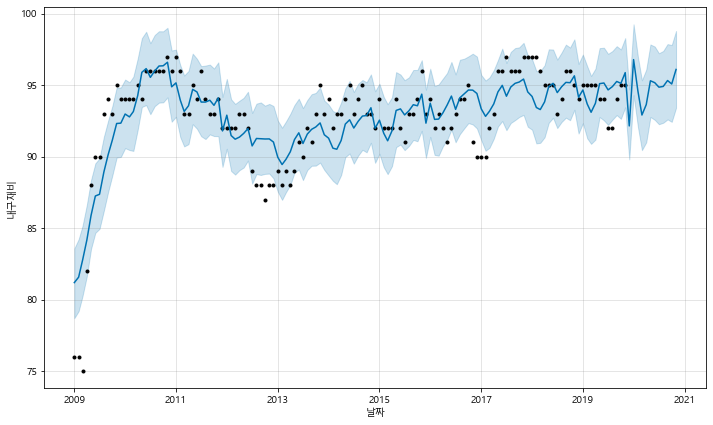

<Figure size 1440x720 with 0 Axes>

In [63]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['내구재 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('내구재비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 의류비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


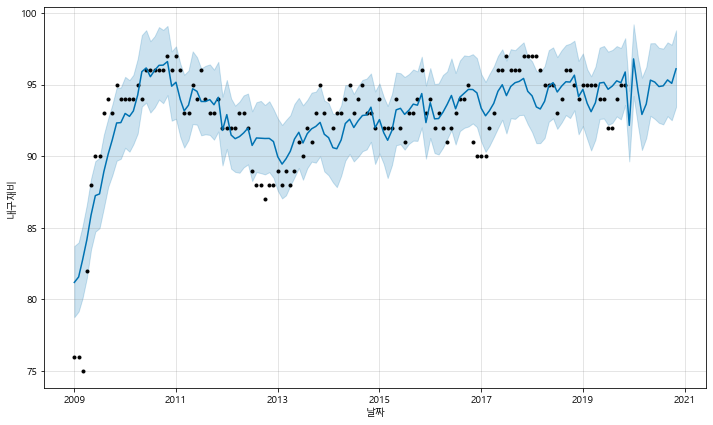

<Figure size 1440x720 with 0 Axes>

In [64]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['내구재 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('내구재비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 외식비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


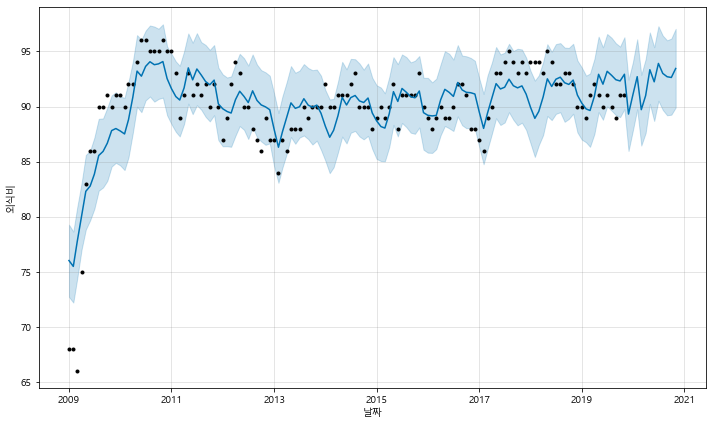

<Figure size 1440x720 with 0 Axes>

In [65]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['외식비 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('외식비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 여행비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


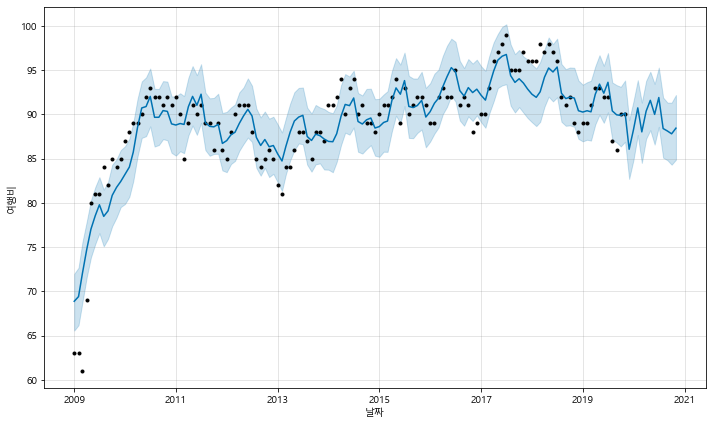

<Figure size 1440x720 with 0 Axes>

In [66]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['여행비 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('여행비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 교육비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


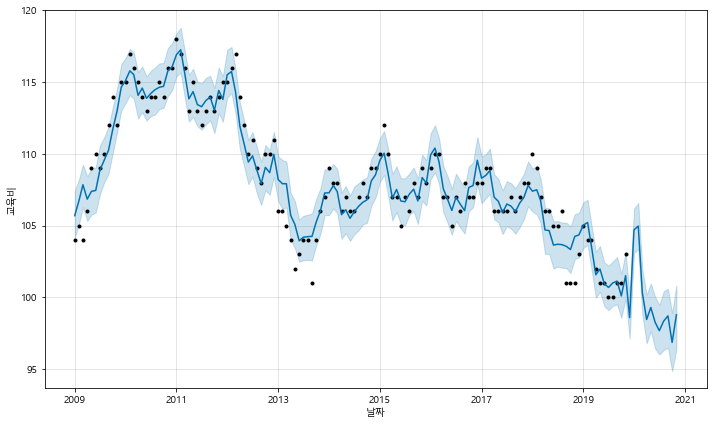

<Figure size 1440x720 with 0 Axes>

In [67]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['교육비 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('교육비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 의료·보건비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


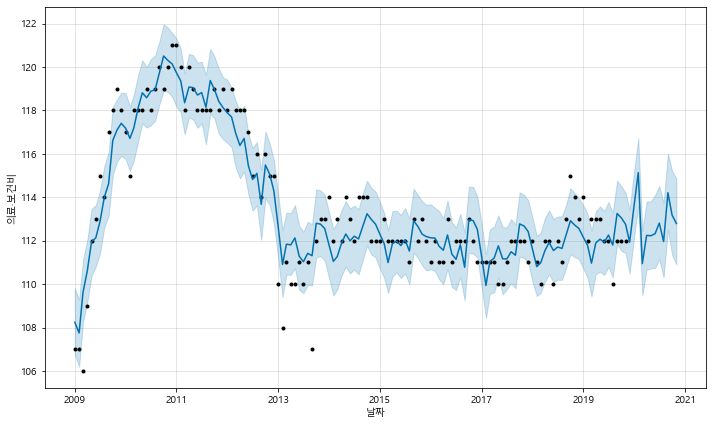

<Figure size 1440x720 with 0 Axes>

In [68]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['의료·보건비 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('의료·보건비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 교양·오락·문화생활비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


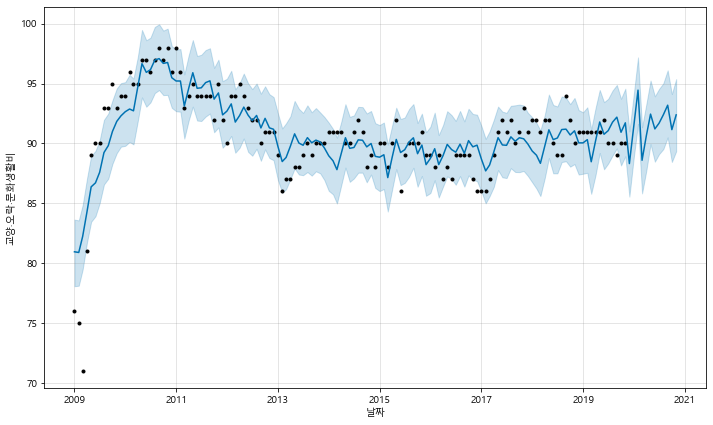

<Figure size 1440x720 with 0 Axes>

In [69]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['교양·오락·문화생활비 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('교양·오락·문화생활비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()

## 교통·통신비

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


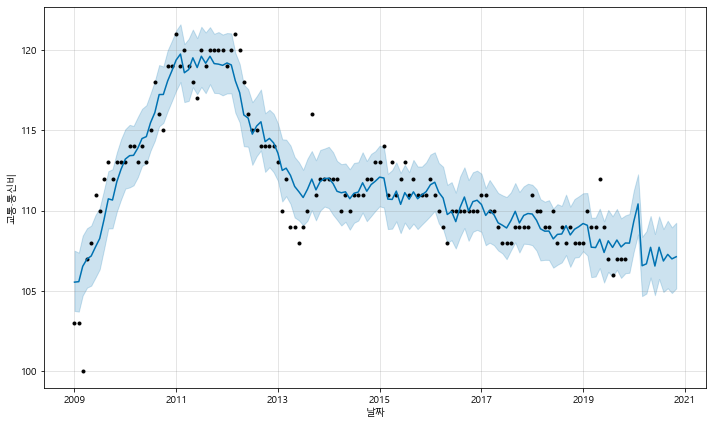

<Figure size 1440x720 with 0 Axes>

In [70]:
df_fit = pd.DataFrame()
df_fit['ds'] = timestamp
df_fit['y'] = df_ts_all['교통비 및 통신비 지출전망CSI'].values

m = Prophet()
m.fit(df_fit)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.xlabel('날짜')
plt.ylabel('교통·통신비')
plt.rc('font', size=10)
plt.figure(figsize=(20,10))
plt.show()